<a href="https://colab.research.google.com/github/Gayathri-Adhimulam/INSE_6220_PROJECT/blob/main/INSE_6220_SUPPLY_CHAIN_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.2.2
Seaborn version:  0.13.2


In [ ]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Gayathri-Adhimulam/INSE_6220_PROJECT/refs/heads/main/supply_chain_data.csv.csv')
df.head(1000)

,Supplier name,Product type,Routes,Transportation modes,Shipping carriers,Shipping times,material Lead time,Manufacturing lead time,Inspection results,Defect rates,Costs,Production Capacity,Safety Stock
0,Supplier 5,Chassis/Powertrain,Route C,Air,Carrier A,6,1,4,Fail,0.018608,523.360915,985,69
1,Supplier 2,Interiour,Route A,Air,Carrier A,1,1,11,Pass,0.021170,126.723033,971,46
2,Supplier 4,Interiour,Route A,Sea,Carrier B,8,1,7,Fail,0.045302,275.524371,964,64
3,Supplier 1,Interiour,Route B,Air,Carrier B,5,1,14,Pass,0.100683,929.235290,963,54
4,Supplier 1,Chassis/Powertrain,Route C,Air,Carrier C,9,2,16,Fail,0.102021,670.934391,955,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Supplier 5,Chassis/Powertrain,Route B,Rail,Carrier A,10,29,21,Fail,4.754801,496.248650,171,31
96,Supplier 5,Exteriour,Route B,Air,Carrier A,10,29,22,Pass,4.843457,465.457006,171,73
97,Supplier 5,Interiour,Route B,Road,Carrier A,2,29,30,Fail,4.854068,503.065579,152,53
98,Supplier 5,Interiour,Route C,Rail,Carrier C,8,30,21,Fail,4.911096,555.859104,109,57


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Supplier name            100 non-null    object 
 1   Product type             100 non-null    object 
 2   Routes                   100 non-null    object 
 3   Transportation modes     100 non-null    object 
 4   Shipping carriers        100 non-null    object 
 5   Shipping times           100 non-null    int64  
 6   material Lead time       100 non-null    int64  
 7   Manufacturing lead time  100 non-null    int64  
 8   Inspection results       100 non-null    object 
 9   Defect rates             100 non-null    float64
 10  Costs                    100 non-null    float64
 11  Production Capacity      100 non-null    int64  
 12  Safety Stock             100 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 10.3+ KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


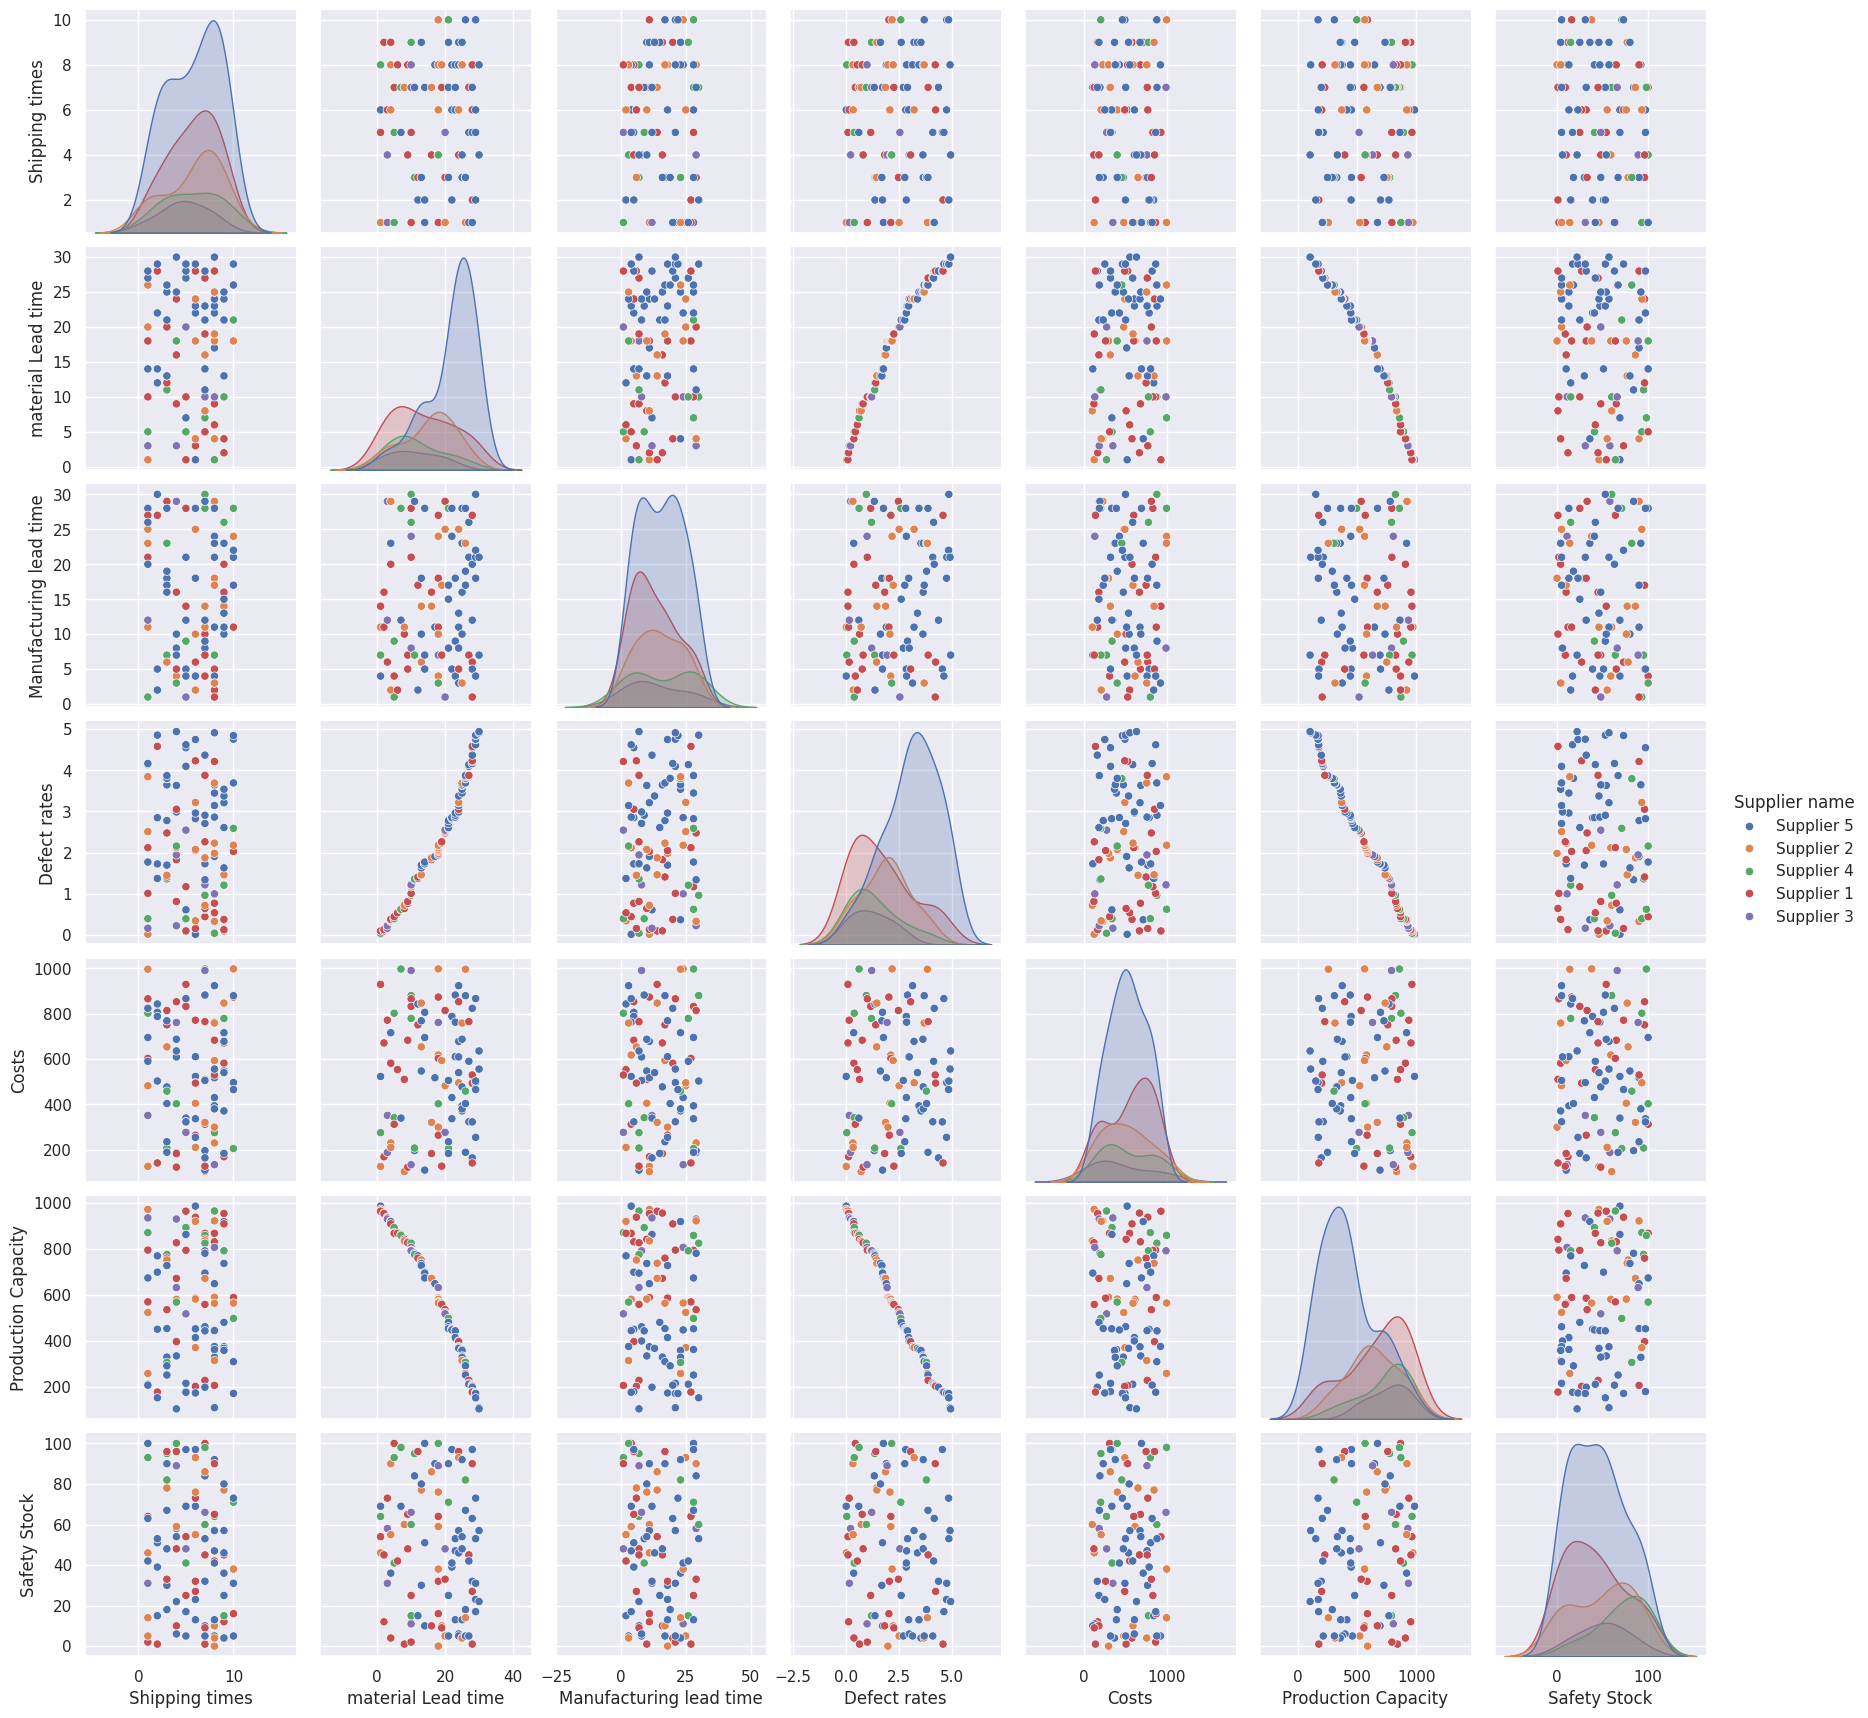

In [ ]:
sns.pairplot(df, hue='Supplier name')
plt.show()

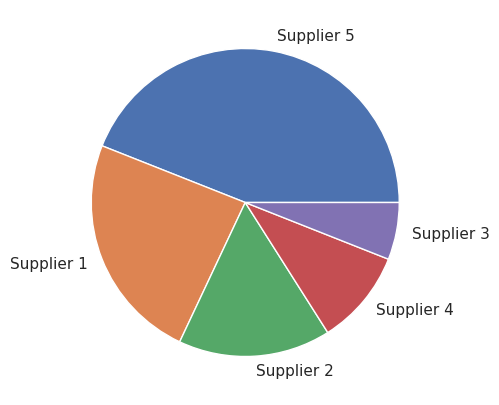

In [ ]:
y =df['Supplier name']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [ ]:
X = df.drop(columns=["Product type", "Routes", "Transportation modes", "Shipping carriers","Inspection results"])
X.head(10)

,Supplier name,Shipping times,material Lead time,Manufacturing lead time,Defect rates,Costs,Production Capacity,Safety Stock
0,Supplier 5,6,1,4,0.018608,523.360915,985,69
1,Supplier 2,1,1,11,0.021170,126.723033,971,46
2,Supplier 4,8,1,7,0.045302,275.524371,964,64
3,Supplier 1,5,1,14,0.100683,929.235290,963,54
4,Supplier 1,9,2,16,0.102021,670.934391,955,45
5,Supplier 1,9,2,11,0.131955,169.271801,953,12
6,Supplier 1,6,3,6,0.159486,771.225085,937,73
7,Supplier 3,1,3,12,0.165872,351.504219,934,31
8,Supplier 3,4,3,29,0.226410,187.752075,929,58
9,Supplier 2,8,4,29,0.333432,230.092782,921,90


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Shipping times,100.0,5.750000,2.724283,1.000000,3.750000,6.000000,8.000000,10.000000
material Lead time,100.0,17.080000,8.846251,1.000000,10.000000,18.000000,25.000000,30.000000
Manufacturing lead time,100.0,14.770000,8.912430,1.000000,7.000000,14.000000,23.000000,30.000000
Defect rates,100.0,2.277158,1.461366,0.018608,1.009650,2.141863,3.563995,4.939255
Costs,100.0,529.245782,258.301696,103.916248,318.778455,520.430444,763.078231,997.413450
Production Capacity,100.0,567.840000,263.046861,104.000000,352.000000,568.500000,797.000000,985.000000
Safety Stock,100.0,47.770000,31.369372,0.000000,16.750000,47.500000,73.000000,100.000000


In [ ]:
X_numeric = X.drop(columns=['Supplier name'])
Xs = StandardScaler().fit_transform(X_numeric)
Xcols = X_numeric.columns
X_scaled = pd.DataFrame(Xs, columns=Xcols)
X_scaled.head(10)

,Shipping times,material Lead time,Manufacturing lead time,Defect rates,Costs,Production Capacity,Safety Stock
0,0.092230,-1.826876,-1.214512,-1.553293,-0.022898,1.593866,0.680184
1,-1.752362,-1.826876,-0.425136,-1.551531,-1.566194,1.540376,-0.056709
2,0.830066,-1.826876,-0.876208,-1.534934,-0.987216,1.513631,0.519990
3,-0.276689,-1.826876,-0.086831,-1.496846,1.556337,1.509810,0.199602
4,1.198984,-1.713265,0.138705,-1.495926,0.551303,1.479244,-0.088748
5,1.198984,-1.713265,-0.425136,-1.475339,-1.400639,1.471602,-1.146029
6,0.092230,-1.599653,-0.988976,-1.456405,0.941528,1.410470,0.808340
7,-1.752362,-1.599653,-0.312368,-1.452014,-0.691583,1.399008,-0.537291
8,-0.645607,-1.599653,1.604690,-1.410379,-1.328733,1.379904,0.327757
9,0.830066,-1.486041,1.604690,-1.336776,-1.163988,1.349338,1.353000


In [ ]:
observations = list(df.index)
variables = list(df.columns)

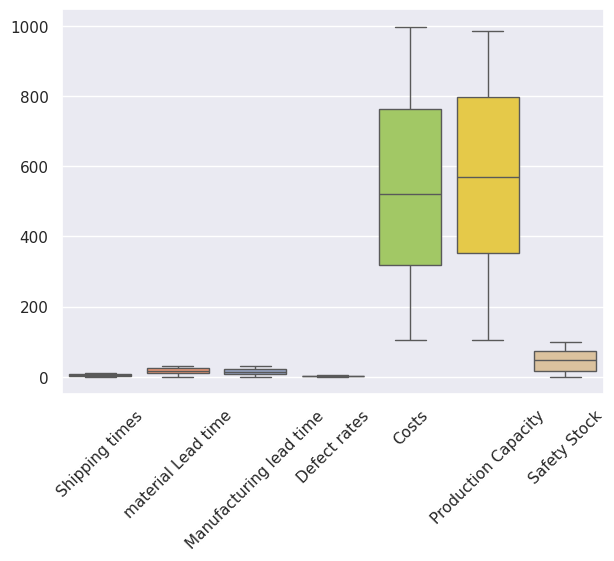

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
# Rotate x-axis tick labels
ax.tick_params(axis='x', labelrotation=45)

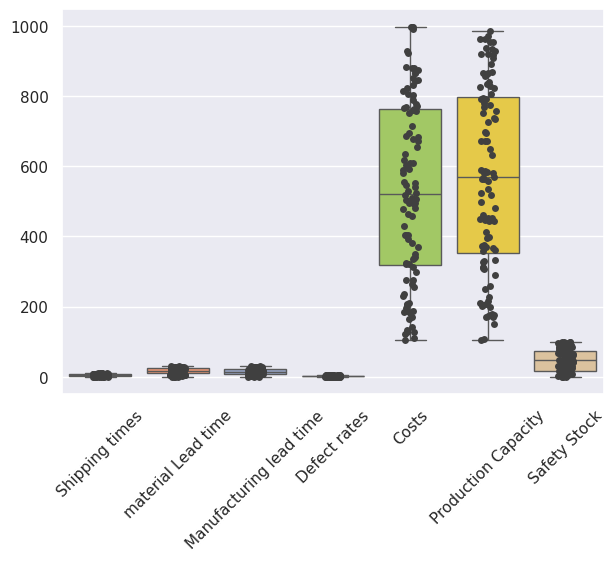

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.tick_params(axis='x', labelrotation=45)

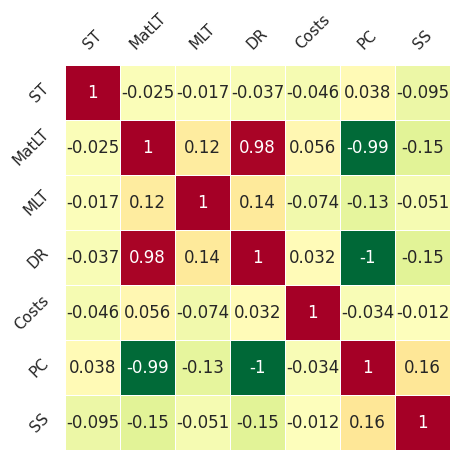

In [ ]:
X_numeric = X.drop(columns=['Supplier name'])

# Create a dictionary mapping long names → short names
rename_map = {
    'Shipping times': 'ST',
    'material Lead time': 'MatLT',
    'Manufacturing lead time': 'MLT',
    'Defect rates': 'DR',
	'Costs':'Costs',
	'Production Capacity':'PC',
	'Safety Stock':'SS'
}

X_numeric = X_numeric.rename(columns=rename_map)

ax = sns.heatmap(X_numeric.corr(), cmap='RdYlGn_r', linewidths=0.5,
                 annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False, labeltop=True)
ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='y', labelrotation=45)

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')


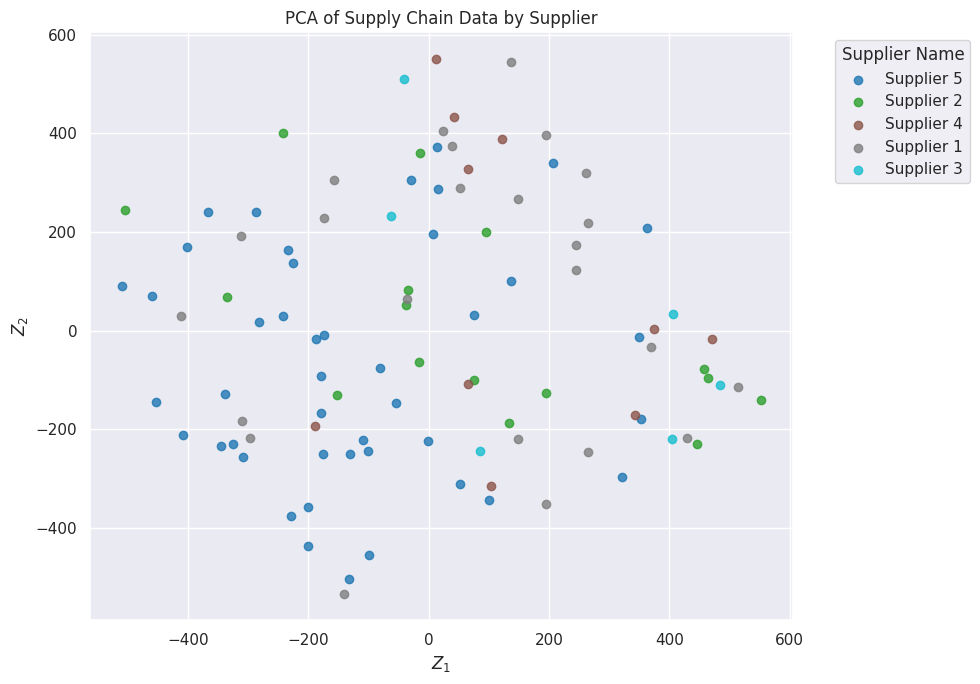

In [ ]:
pca = PCA()
# Use the X_numeric DataFrame which only contains numerical features
Z = pca.fit_transform(X_numeric)

# Re-define y to ensure it's the 'Supplier name' Series
y = df['Supplier name']

# Encode 'Supplier name' from y into numerical labels for plotting
unique_suppliers = y.unique()
supplier_to_int = {name: i for i, name in enumerate(unique_suppliers)}
y_encoded = y.map(supplier_to_int)

# Create indices for each supplier based on the encoded labels
plt.figure(figsize=(10, 7))
colors = plt.get_cmap('tab10', len(unique_suppliers)) # Use plt.get_cmap for discrete colors

for i, supplier_name in enumerate(unique_suppliers):
    idx = np.where(y_encoded == i)
    plt.scatter(Z[idx, 0], Z[idx, 1], color=colors(i), label=supplier_name, alpha=0.8)

plt.legend(title='Supplier Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.title('PCA of Supply Chain Data by Supplier')
plt.grid(True)
plt.tight_layout()
plt.show()

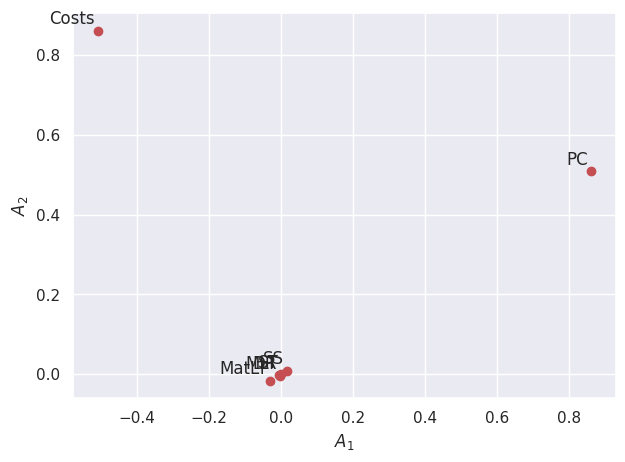

In [ ]:
A = pca.components_.T

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
# Use X_numeric.columns for labels as PCA was performed on X_numeric
for label, x, y in zip(X_numeric.columns, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

variables_short = [rename_map.get(v, v) for v in variables]

plt.scatter(A[:, 0], A[:, 1],
            marker='o',
            c=A[:, 2],
            s=A[:, 3] * 500,
            cmap=plt.get_cmap('Spectral'))

plt.xlabel('$A_1$')
plt.ylabel('$A_2$')

# unique offsets for EACH label (in same order as variables_short)
offsets = [
    (-20, 20),   # ST
    (20, -10),   # MatLT
    (20, 10),    # MLT
    (-20, -10),  # DR
    (30, 0),     # Costs
    (-30, 0),    # PC
    (0, -25),    # SS
    (0, 25),     # PT
    (-15, 15),   # RT
    (15, 15),    # TM
    (20, 25),    # SC
    (-20, -20),  # IR
    (10, -25)    # SN
]

for (label, x, y), (dx, dy) in zip(zip(variables_short, A[:, 0], A[:, 1]), offsets):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(dx, dy),
        textcoords='offset points',
        ha='right' if dx < 0 else 'left',
        va='bottom' if dy > 0 else 'top',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
    )

  offset_y = 10  # adjust if needed

  for bar, label in zip(bars, categories):
      height = bar.get_height()
      plt.annotate(
          label,
          xy=(bar.get_x() + bar.get_width() / 2, height),
          xycoords='data',
          xytext=(0, offset_y),
          textcoords='offset points',
          ha='center',
          va='bottom',
          clip_on=True,              # keeps label inside graph
          fontsize=10,
          wrap=True
      )



/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


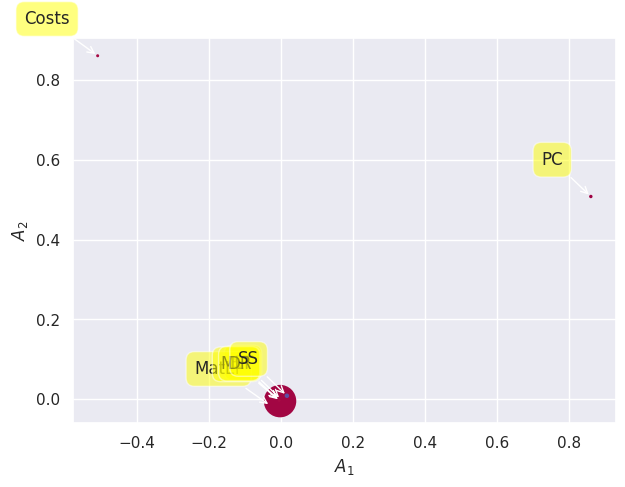

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.colormaps.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(X_numeric.columns,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0, 0.5, 'Cumulative explained variance')

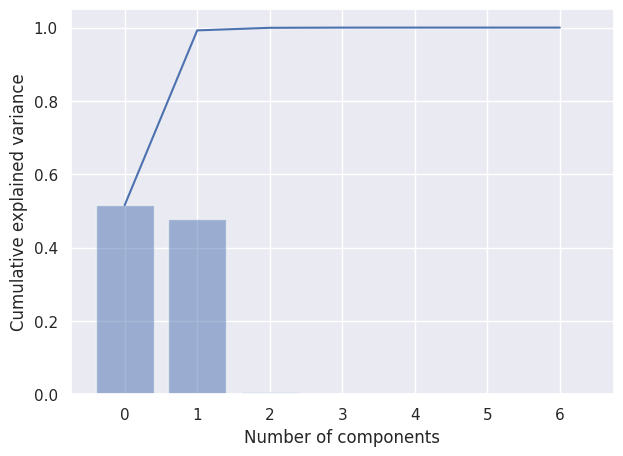

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

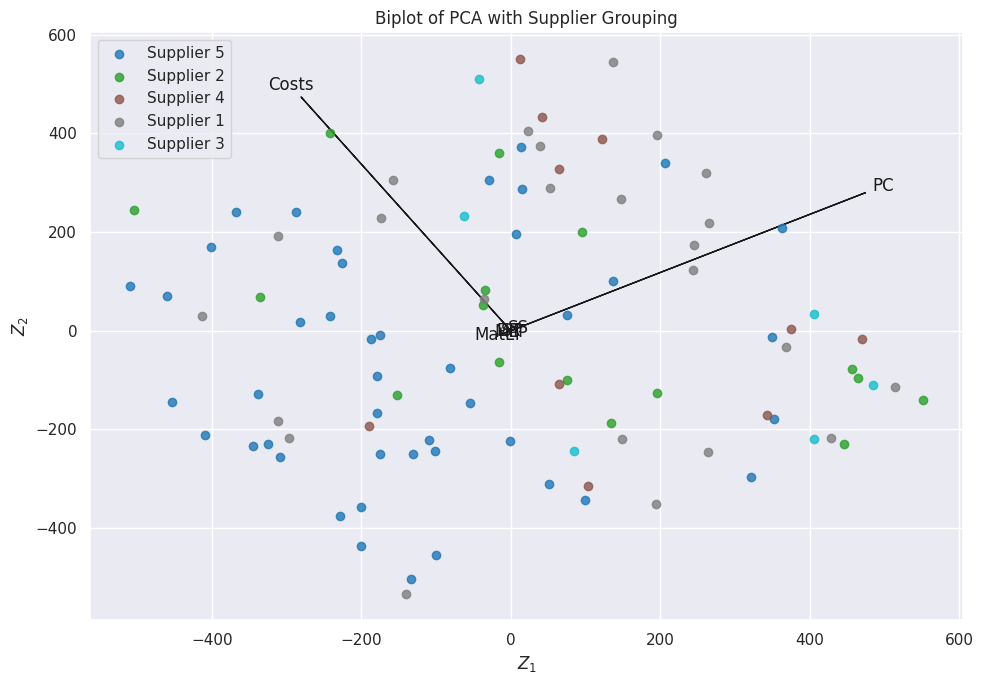

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure(figsize=(10, 7))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

# Use X_numeric.columns for arrow labels, as PCA was performed on X_numeric
variable_names = X_numeric.columns

for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.05, A2[i]*max(Z2)*1.05, variable_names[i], color='k', ha='center', va='center')

# Plot the data points (Z scores) by supplier
# This uses the same logic as the previous cell AjSHvUtFsin1
colors = plt.get_cmap('tab10', len(unique_suppliers)) # Use plt.get_cmap for discrete colors

for i, supplier_name in enumerate(unique_suppliers):
    idx = np.where(y_encoded == i)
    plt.scatter(Z[idx, 0], Z[idx, 1], color=colors(i), label=supplier_name, alpha=0.8)

plt.legend(loc='upper left')
plt.title('Biplot of PCA with Supplier Grouping')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install pca

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.4/190.4 kB 9.5 MB/s eta 0:00:00


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca(n_components=0.85)
# Fit transform
out = model.fit_transform(X_scaled)

[13-12-2025 20:43:16] [pca.pca] [INFO] Extracting column labels from dataframe.
[13-12-2025 20:43:16] [pca.pca] [INFO] Extracting row labels from dataframe.
[13-12-2025 20:43:16] [pca.pca] [INFO] PCA reduction performed to capture at least 85.0% explained variance using 7 columns of the input data.
[13-12-2025 20:43:16] [pca.pca] [INFO] Fit using PCA.
[13-12-2025 20:43:16] [pca.pca] [INFO] Compute loadings and PCs.
[13-12-2025 20:43:16] [pca.pca] [INFO] Compute explained variance.
[13-12-2025 20:43:16] [pca.pca] [INFO] The top 4 principal component(s) explains >= 85.00% of the explained variance.
[13-12-2025 20:43:16] [pca.pca] [INFO] The PCA reduction is performed on 7 variables (columns) of the input dataframe.
[13-12-2025 20:43:16] [pca.pca] [INFO] Fit using PCA.
[13-12-2025 20:43:16] [pca.pca] [INFO] Compute loadings and PCs.
[13-12-2025 20:43:16] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[13-12-2025 20:43:16] [pca.pca] [INFO]

In [ ]:
out['PC']

,PC1,PC2,PC3,PC4
0,3.052657,-0.456905,-0.438020,-0.665668
1,2.843340,-0.251436,1.397024,-0.033444
2,2.985688,0.672772,-0.075385,-1.115013
3,2.727403,-0.870622,-0.721753,1.169359
4,2.648561,0.771879,-0.771845,0.457069
...,...,...,...,...
95,-2.707533,1.367754,-0.418607,-0.282445
96,-2.576095,0.800919,0.250835,-0.942808
97,-2.878162,-0.541258,1.702766,0.921010
98,-2.884235,0.356793,0.097768,-0.383363


[13-12-2025 20:43:16] [pca.pca] [WARNING] Parameter <label> is deprecated and will not be supported in future version.
[13-12-2025 20:43:16] [scatterd.scatterd] [INFO] Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': 'The top 4 Principal Component(s) explains [87.50%] of the variance.'}, xlabel='PC1 (43.4% expl.var)', ylabel='PC2 (15.8% expl.var)'>)

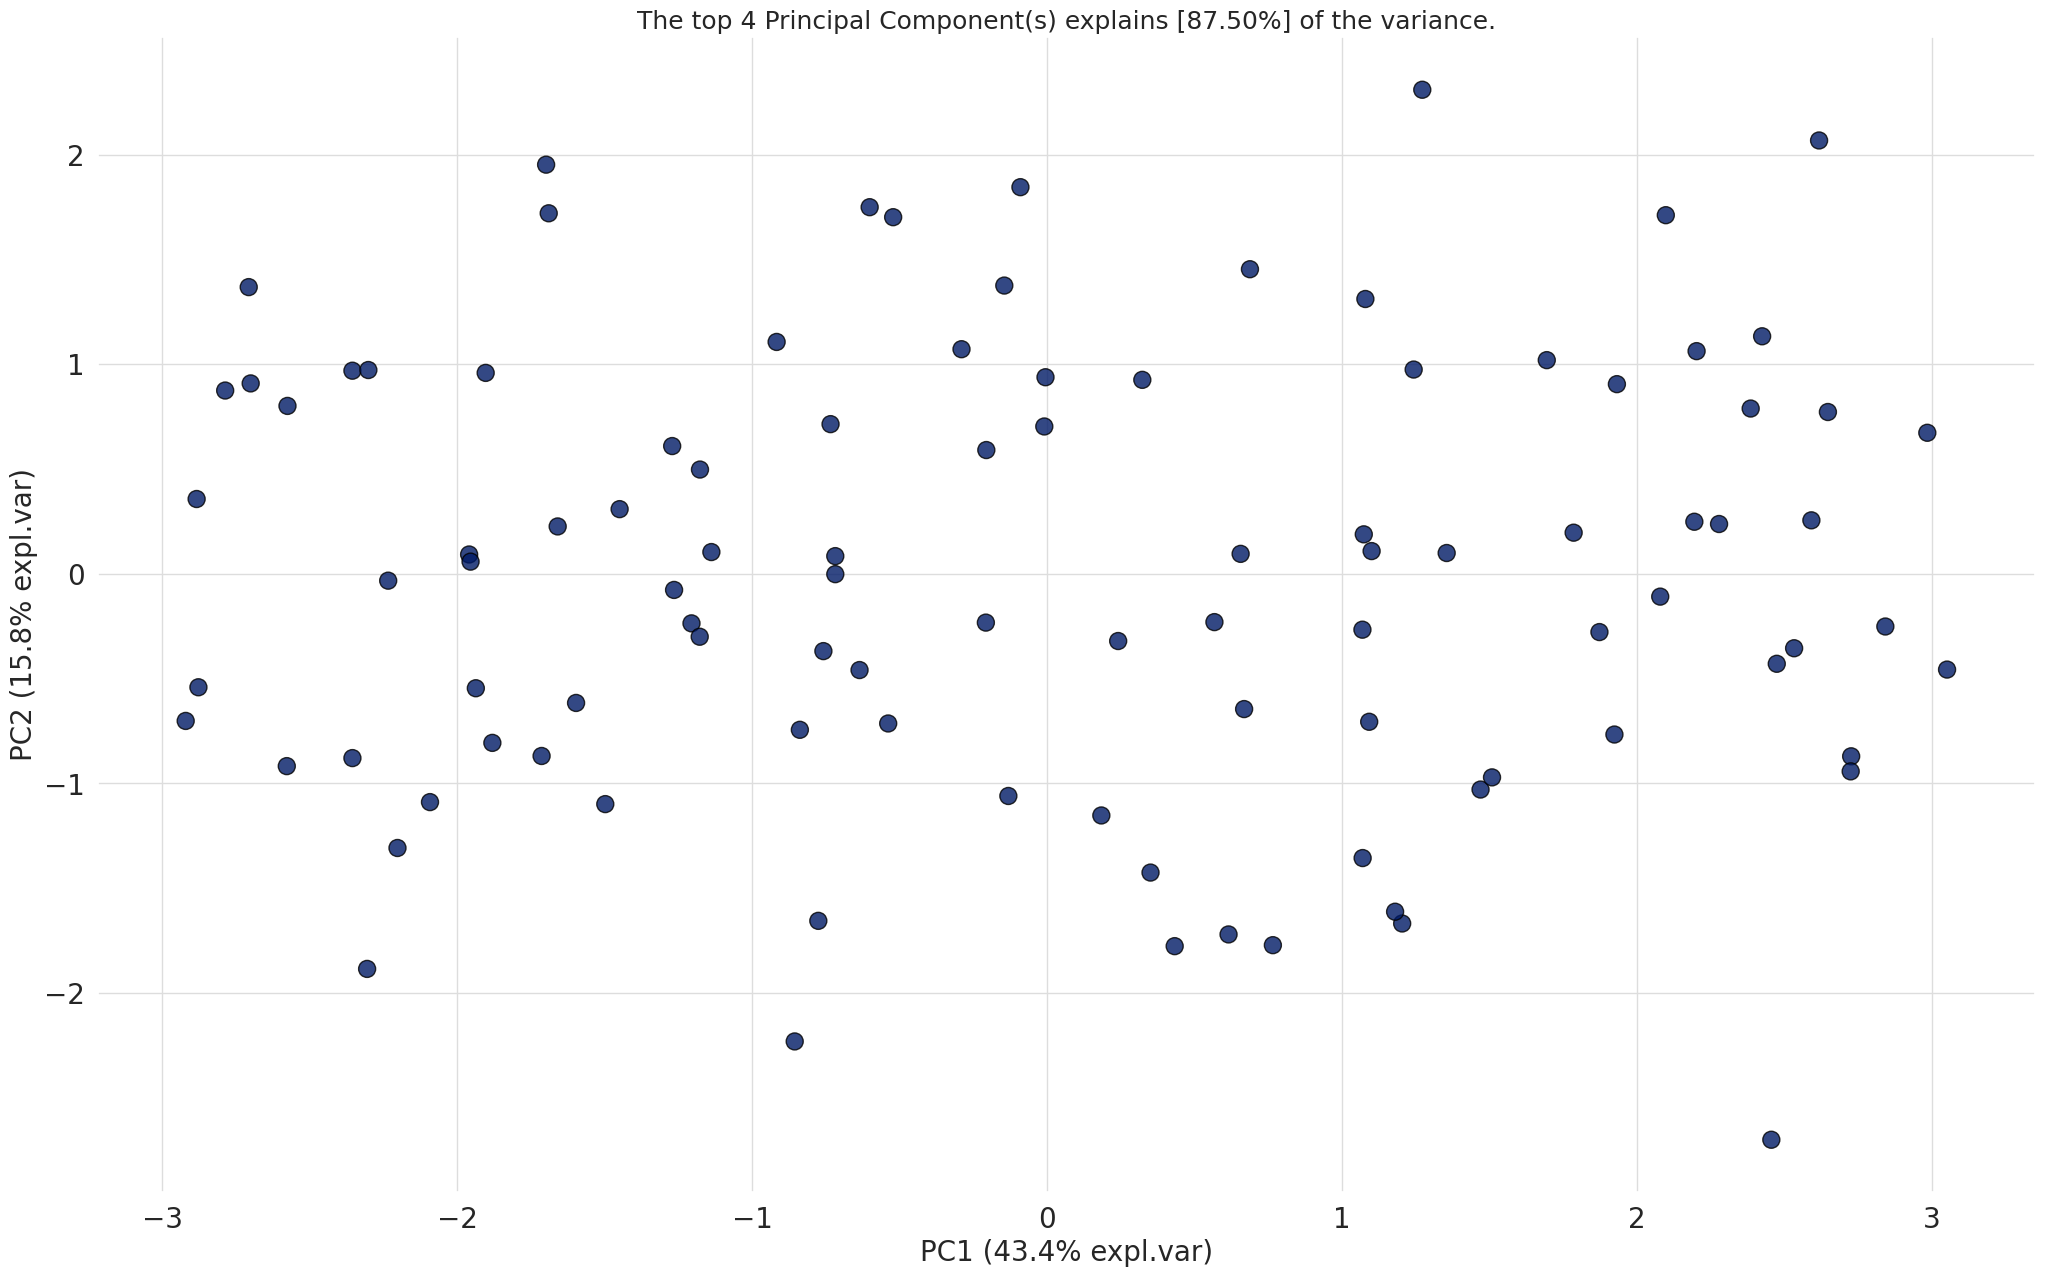

In [ ]:
model.scatter(label=True, legend=False)

In [ ]:
A = out['loadings'].T

/tmp/ipython-input-26-2612628088.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],


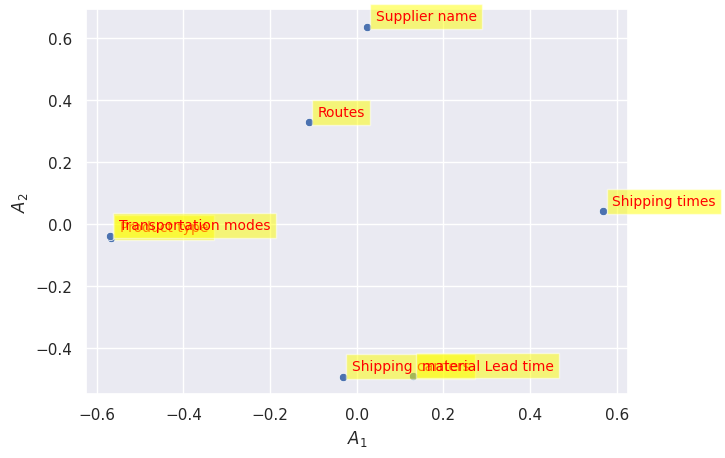

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

In [ ]:
!pip install adjustText


/tmp/ipython-input-28-1707505903.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x=A.PC1[i],
/tmp/ipython-input-28-1707505903.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y=A.PC2[i],


([Text(0.14684186592090842, 0.6615713591098202, 'Supplier name'),
  Text(-0.4510482733564245, -0.04114665378290516, 'Product type'),
  Text(-0.05135306737069756, 0.3109270397237627, 'Routes'),
  Text(-0.40102634317973507, 0.013817647420715562, 'Transportation modes'),
  Text(0.035347474889093955, -0.45617187261114467, 'Shipping carriers'),
  Text(0.49537167348850053, 0.06956495583734013, 'Shipping times'),
  Text(0.3513932726223752, -0.4779193621345871, 'material Lead time')],
 [Text(-0.4510482733564245, -0.04114665378290516, ''),
  Text(-0.40102634317973507, 0.013817647420715562, ''),
  Text(0.035347474889093955, -0.45617187261114467, ''),
  Text(0.49537167348850053, 0.06956495583734013, ''),
  Text(0.3513932726223752, -0.4779193621345871, '')])

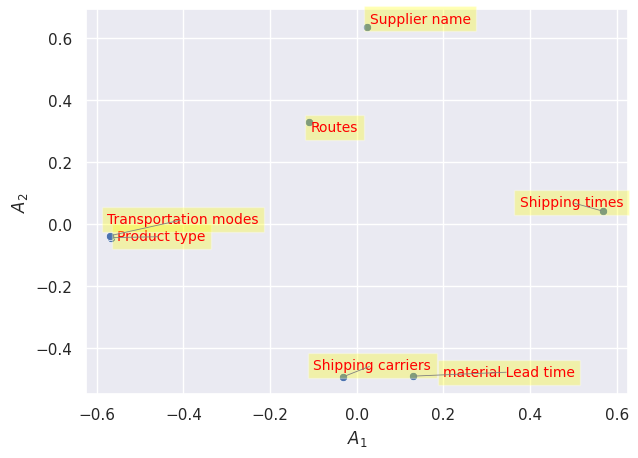

In [ ]:
from adjustText import adjust_text
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')

texts = []

for i in range(A.shape[0]):
    t = plt.text(
        x=A.PC1[i],
        y=A.PC2[i],
        s=variables[i],
        fontdict=dict(color='red', size=10),
        bbox=dict(facecolor='yellow', alpha=0.3)
    )
    texts.append(t)

# --- automatic separation of overlapping labels ---
adjust_text(
    texts,
    force_text=0.4,
    force_points=0.3,
    expand_text=(1.4, 1.4),
    expand_points=(1.2, 1.2),
    arrowprops=dict(arrowstyle='-', color='gray', lw=0.6)
)


[13-12-2025 20:43:35] [pca.pca] [WARNING] Parameter <label> is deprecated and will not be supported in future version.
[13-12-2025 20:43:35] [pca.pca] [INFO] Plot PC1 vs PC2 with loadings.
[13-12-2025 20:43:35] [scatterd.scatterd] [INFO] Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': 'The top 4 Principal Component(s) explains [87.50%] of the variance.'}, xlabel='PC1 (43.4% expl.var)', ylabel='PC2 (15.8% expl.var)'>)

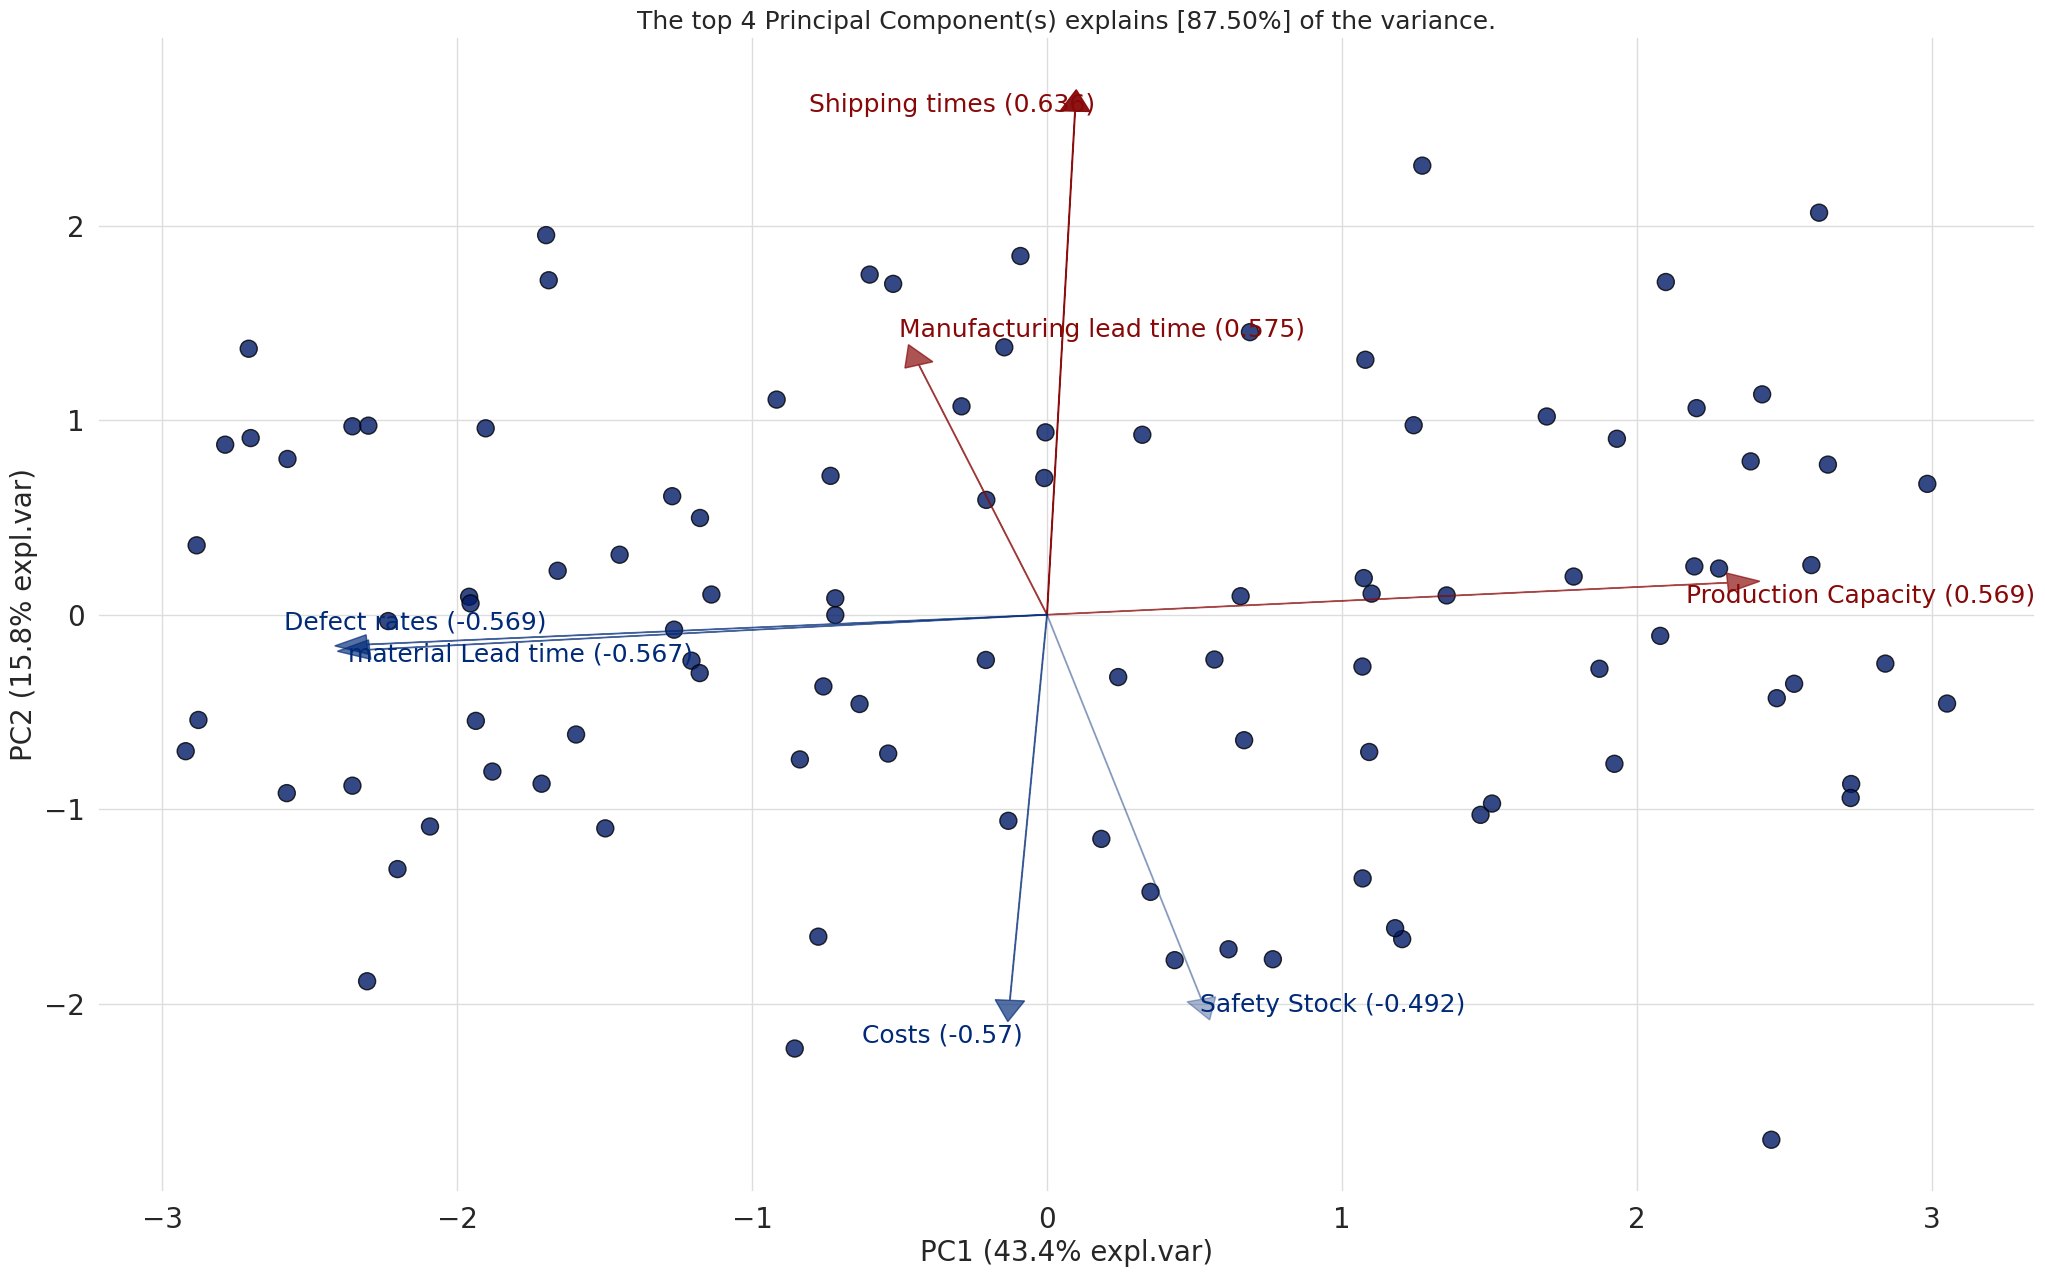

In [ ]:
model.biplot(label=False, legend=False)

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (90, 13)
Unseen Data For Predictions: (10, 13)


In [ ]:
# install slim version (default)
!pip install pycaret

In [ ]:
import pycaret
print("PyCaret version: ", pycaret.__version__)

PyCaret version:  3.3.2


In [ ]:
import pandas as pd
df_housing = pd.read_csv('sample_data/california_housing_train.csv')
from pycaret.regression import *
reg = setup(data=df_housing, target='median_house_value', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,median_house_value
2,Target type,Regression
3,Original data shape,"(17000, 9)"
4,Transformed data shape,"(17000, 9)"
5,Transformed train set shape,"(11900, 9)"
6,Transformed test set shape,"(5100, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
import pandas as pd

df_housing = pd.read_csv('sample_data/california_housing_train.csv')
display(df_housing.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
 #show the best model and their statistics
 best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,32136.6254,2262389478.6331,47529.0103,0.8311,0.2364,0.1811,0.8660
xgboost,Extreme Gradient Boosting,32689.4684,2370896051.2000,48650.7539,0.8229,0.2454,0.1838,0.3110
rf,Random Forest Regressor,33037.9166,2517264404.7862,50138.1705,0.8122,0.2413,0.1835,9.6110
et,Extra Trees Regressor,36051.6564,2872797263.9210,53562.8092,0.7857,0.2543,0.2005,3.5110
gbr,Gradient Boosting Regressor,38195.7798,2996213746.3030,54712.7441,0.7763,0.2709,0.2172,2.1730
ridge,Ridge Regression,50802.3672,4765303296.0000,69008.3461,0.6445,0.4364,0.3039,0.1020
llar,Lasso Least Angle Regression,50802.3711,4765231206.4000,69007.8375,0.6445,0.4395,0.3039,0.1290
br,Bayesian Ridge,50800.9809,4765301606.4000,69008.3047,0.6445,0.4351,0.3039,0.0920
lasso,Lasso Regression,50802.5441,4765304320.0000,69008.3562,0.6445,0.4368,0.3039,0.1300
lr,Linear Regression,50802.6781,4765304166.4000,69008.3555,0.6445,0.4371,0.3039,2.3340


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
best_model

LGBMRegressor(n_jobs=-1, random_state=123)

In [ ]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,47674.1622,5536374448.6160,74406.8172,0.5956,0.3398,0.2563
1,47649.7126,5664151825.9311,75260.5596,0.5704,0.3504,0.2559
2,45404.5866,4971559031.6454,70509.2833,0.6021,0.3318,0.2525
3,45424.6588,4934643343.3983,70247.0166,0.6363,0.3222,0.2458
4,46161.5521,4906425064.5773,70045.8783,0.6415,0.3240,0.2377
5,46792.4899,5528591769.8008,74354.5007,0.5951,0.3489,0.2595
6,43394.9076,4550378459.1933,67456.4931,0.6417,0.3130,0.2299
7,42754.7487,4346143077.6899,65925.2841,0.6831,0.3105,0.2398
8,45750.8084,5233920076.3546,72345.8366,0.6208,0.3406,0.2508


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
dt

DecisionTreeRegressor(random_state=123)

In [ ]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,41918.2265,4002268613.0723,63263.4856,0.7077,0.2980,0.2288
1,42659.7216,4154421926.0350,64454.8053,0.6849,0.2894,0.2219
2,41869.9613,3750595332.0168,61242.1042,0.6998,0.2977,0.2373
3,42824.8399,4082702828.8748,63896.0314,0.6991,0.2968,0.2319
4,45361.3679,4544847036.4234,67415.4807,0.6679,0.3050,0.2355
5,43097.1753,3974818288.3803,63046.1600,0.7089,0.3048,0.2437
6,40282.4907,3617128938.9648,60142.5718,0.7152,0.2867,0.2186
7,41385.5970,3677523702.4557,60642.5898,0.7319,0.2871,0.2306
8,40553.3628,3965096511.0226,62969.0123,0.7128,0.2943,0.2260


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_dt

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=1.0,
                      min_impurity_decrease=0.01, min_samples_leaf=2,
                      min_samples_split=9, random_state=123)

In [ ]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
knn = create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,78364.1797,10394240000.0000,101952.1484,0.2408,0.5336,0.5195
1,77147.5469,9917257728.0000,99585.4297,0.2478,0.5365,0.5280
2,76124.4844,9998269440.0000,99991.3438,0.1998,0.5218,0.5056
3,76793.1953,9895702528.0000,99477.1484,0.2707,0.5194,0.5015
4,79071.8516,10634177536.0000,103122.1484,0.2229,0.5306,0.5069
5,77863.4297,10155026432.0000,100772.1484,0.2563,0.5285,0.5136
6,75638.3984,9616118784.0000,98061.8125,0.2428,0.5078,0.4948
7,75327.3828,9837402112.0000,99183.6797,0.2828,0.5255,0.5114
8,78295.7578,10184889344.0000,100920.2109,0.2622,0.5212,0.5050


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,76131.3281,9459602432.0000,97260.4844,0.3091,0.5143,0.5104
1,73053.8750,8844357632.0000,94044.4453,0.3292,0.5076,0.4996
2,73666.7812,9086817280.0000,95324.7969,0.2728,0.5041,0.4963
3,75833.2656,9133858816.0000,95571.2266,0.3268,0.5006,0.4967
4,76184.3594,9395091456.0000,96928.2812,0.3134,0.5039,0.4958
5,76110.5859,9609527296.0000,98028.1953,0.2962,0.5162,0.5122
6,73868.0234,8949155840.0000,94599.9766,0.2953,0.4927,0.4815
7,74412.7500,9171837952.0000,95769.7109,0.3313,0.5097,0.5016
8,76030.5859,9403355136.0000,96970.8984,0.3188,0.5055,0.5013


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,52009.5664,4851849216.0000,69655.2188,0.6456,0.4604,0.3123
1,49511.4141,4803695104.0000,69308.6953,0.6356,0.4347,0.2924
2,50399.9883,4640061952.0000,68118.0000,0.6286,0.4628,0.3103
3,52797.0156,5047846400.0000,71048.1953,0.6280,0.4360,0.3146
4,51059.7695,4953540096.0000,70381.3906,0.6380,0.4404,0.2964
5,51886.8555,5039557632.0000,70989.8438,0.6309,0.3834,0.3034
6,49958.1328,4562436096.0000,67545.8047,0.6407,0.4201,0.3016
7,49233.6953,4417676800.0000,66465.6094,0.6779,0.4157,0.2998
8,49793.3125,4353960960.0000,65984.5547,0.6846,0.4531,0.2989


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr

LinearRegression(n_jobs=-1)

In [ ]:
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,52009.5664,4851849216.0000,69655.2188,0.6456,0.4604,0.3123
1,49511.4141,4803695104.0000,69308.6953,0.6356,0.4347,0.2924
2,50399.9883,4640061952.0000,68118.0000,0.6286,0.4628,0.3103
3,52797.0156,5047846400.0000,71048.1953,0.6280,0.4360,0.3146
4,51059.7695,4953540096.0000,70381.3906,0.6380,0.4404,0.2964
5,51886.8555,5039557632.0000,70989.8438,0.6309,0.3834,0.3034
6,49958.1328,4562436096.0000,67545.8047,0.6407,0.4201,0.3016
7,49233.6953,4417676800.0000,66465.6094,0.6779,0.4157,0.2998
8,49793.3125,4353960960.0000,65984.5547,0.6846,0.4531,0.2989


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_lr

LinearRegression(n_jobs=-1)

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33817.0872,2641282463.6043,51393.4088,0.8071,0.2456,0.1874
1,33480.4358,2683175968.6265,51799.3819,0.7965,0.2413,0.1795
2,32286.5576,2387001962.2604,48856.9541,0.8090,0.2449,0.1877
3,34293.1771,2644626544.7741,51425.9326,0.8051,0.2468,0.1886
4,32508.9692,2539200734.0645,50390.4826,0.8144,0.2312,0.1701
5,34379.1583,2763233636.0717,52566.4687,0.7976,0.2575,0.1962
6,32140.5284,2387209969.4684,48859.0828,0.8120,0.2328,0.1755
7,32357.3201,2191136183.9842,46809.5736,0.8402,0.2406,0.1879
8,31260.0933,2275944614.3481,47706.8613,0.8351,0.2315,0.1765


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33868.5974,2516049259.8583,50160.2358,0.8162,0.2521,0.1937
1,33161.2437,2471699182.8996,49716.1863,0.8125,0.2400,0.1844
2,32652.2261,2273513456.6098,47681.3743,0.8180,0.2431,0.1915
3,34023.1008,2453150871.7579,49529.2931,0.8192,0.2512,0.1935
4,32499.2819,2419986270.7347,49193.3560,0.8232,0.2382,0.1782
5,33597.4966,2494332935.8081,49943.2972,0.8173,0.2507,0.1919
6,32215.8569,2282951543.1783,47780.2422,0.8202,0.2377,0.1788
7,32289.8280,2087358189.8079,45687.6153,0.8478,0.2447,0.1902
8,31499.2330,2045922974.4880,45231.8801,0.8518,0.2306,0.1771


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model

LGBMRegressor(n_jobs=-1, random_state=123)

In [ ]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
from pycaret.regression import setup
clf_pca = setup(data=df_housing, target='median_house_value', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,Session id,123
1,Target,median_house_value
2,Target type,Regression
3,Original data shape,"(17000, 9)"
4,Transformed data shape,"(17000, 4)"
5,Transformed train set shape,"(11900, 4)"
6,Transformed test set shape,"(5100, 4)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model_pca = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,59454.2120,6658300278.3603,81570.6593,0.5036,0.4034,0.3569,0.4730
rf,Random Forest Regressor,60622.0816,7048193782.2702,83925.1548,0.4745,0.4131,0.3638,4.3560
xgboost,Extreme Gradient Boosting,61518.0762,7160571545.6000,84582.1109,0.4661,0.4204,0.3670,0.1810
et,Extra Trees Regressor,61675.4554,7262900857.8080,85200.1020,0.4584,0.4181,0.3697,1.7910
gbr,Gradient Boosting Regressor,63713.8015,7345395530.2027,85679.7830,0.4524,0.4240,0.3875,1.4270
knn,K Neighbors Regressor,65334.3770,7969553920.0000,89248.9938,0.4059,0.4416,0.3941,0.0590
br,Bayesian Ridge,73971.3039,9309981696.0000,96472.4562,0.3057,0.5001,0.4758,0.0740
llar,Lasso Least Angle Regression,73969.5719,9309978521.6000,96472.4352,0.3057,0.5001,0.4758,0.0430
lar,Least Angle Regression,73969.5328,9309981491.2000,96472.4500,0.3057,0.5001,0.4758,0.0640
ridge,Ridge Regression,73969.7477,9309976473.6000,96472.4281,0.3057,0.5001,0.4758,0.0410


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
best_model_pca

LGBMRegressor(n_jobs=-1, random_state=123)

In [ ]:
from pycaret.regression import tune_model
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,61256.4824,7093730673.2831,84224.2879,0.4819,0.4161,0.3686
1,61646.0590,6942285478.8920,83320.3785,0.4734,0.4198,0.3816
2,60402.6615,6545270894.9865,80902.8485,0.4762,0.4096,0.3698
3,63162.4072,7264164623.1250,85230.0688,0.4646,0.4234,0.3910
4,63542.3116,7493973393.5750,86567.7388,0.4524,0.4149,0.3648
5,63072.4164,7274567560.9847,85291.0755,0.4672,0.4223,0.3823
6,59828.6971,6580410048.5870,81119.7266,0.4818,0.4035,0.3607
7,61887.0419,7038408875.0586,83895.2256,0.4868,0.4197,0.3794
8,60319.4365,6599963713.8336,81240.1607,0.5219,0.4003,0.3620


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model_pca

LGBMRegressor(n_jobs=-1, random_state=123)

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
 rf_pca = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,62201.4693,7553334019.0892,86909.9190,0.4483,0.4218,0.3688
1,59891.8376,6963724697.1081,83448.9347,0.4718,0.4157,0.3616
2,59063.4315,6465972776.5324,80411.2727,0.4825,0.3994,0.3532
3,61048.8104,7054557608.3753,83991.4139,0.4801,0.4157,0.3768
4,61820.9487,7527283391.2499,86759.9181,0.4499,0.4169,0.3563
5,61187.7068,7180078336.9403,84735.3429,0.4742,0.4191,0.3708
6,60015.1268,6719241303.6159,81970.9784,0.4709,0.4111,0.3630
7,60733.1699,7006880788.8670,83707.1131,0.4891,0.4133,0.3660
8,59034.9721,6556532407.0516,80972.4176,0.5250,0.4027,0.3609


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
!pip install pycaret[analysis]

INFO: pip is looking at multiple versions of interpret-core to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 45.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of umap-learn to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dash-bootstrap-components to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of salib to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.1/355.1 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

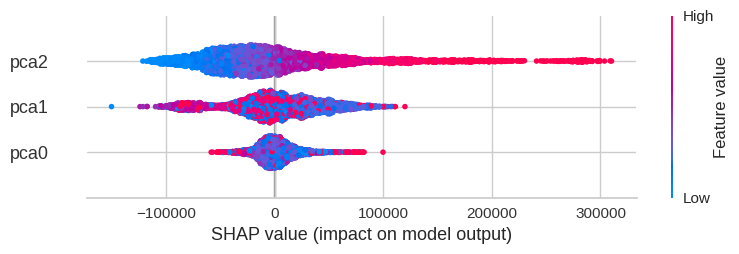

In [ ]:
interpret_model(rf_pca, plot='summary')